<a href="https://colab.research.google.com/github/MAL3X-01/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/Marvin_Davila_DS5_Unit_1_Sprint_Challenge_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 1

## Loading, cleaning, visualizing, and analyzing data

In this sprint challenge you will look at a dataset of the survival of patients who underwent surgery for breast cancer.

http://archive.ics.uci.edu/ml/datasets/Haberman%27s+Survival

Data Set Information:
The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

Attribute Information:
1. Age of patient at time of operation (numerical)
2. Patient's year of operation (year - 1900, numerical)
3. Number of positive axillary nodes detected (numerical)
4. Survival status (class attribute)
-- 1 = the patient survived 5 years or longer
-- 2 = the patient died within 5 year

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
- Validate that you have no missing values.
- Add informative names to the features.
- The survival variable is encoded as 1 for surviving >5 years and 2 for not - change this to be 0 for not surviving and 1 for surviving >5 years (0/1 is a more traditional encoding of binary variables)

At the end, print the first five rows of the dataset to demonstrate the above.

In [0]:
# importing python libraries
import numpy as np
import pandas as pd

# Increased length of display 
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [0]:
# reading survival data to understand csv better
!curl https://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.names

1. Title: Haberman's Survival Data

2. Sources:
   (a) Donor:   Tjen-Sien Lim (limt@stat.wisc.edu)
   (b) Date:    March 4, 1999

3. Past Usage:
   1. Haberman, S. J. (1976). Generalized Residuals for Log-Linear
      Models, Proceedings of the 9th International Biometrics
      Conference, Boston, pp. 104-122.
   2. Landwehr, J. M., Pregibon, D., and Shoemaker, A. C. (1984),
      Graphical Models for Assessing Logistic Regression Models (with
      discussion), Journal of the American Statistical Association 79:
      61-83.
   3. Lo, W.-D. (1993). Logistic Regression Trees, PhD thesis,
      Department of Statistics, University of Wisconsin, Madison, WI.

4. Relevant Information:
   The dataset contains cases from a study that was conducted between
   1958 and 1970 at the University of Chicago's Billings Hospital on
   the survival of patients who had undergone surgery for breast
   cancer.

5. Number of Instances: 306

6. Number of Attributes: 4 (including the class attribute)

7. 

In [0]:
# reading csv and naming it 'bc' and making header None 
bc = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data', header=None)

print(bc.shape)
bc.head()

(306, 4)


,0,1,2,3
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [0]:
#renaming column header 
column_headers = ['age', 'year_of_op', 'num_pos_axnodes', 'survival_status']

bc = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data', names = column_headers)
bc.head()

,age,year_of_op,num_pos_axnodes,survival_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [0]:
# NO null value in this dataset
bc.isnull().sum()

age                0
year_of_op         0
num_pos_axnodes    0
survival_status    0
dtype: int64

In [0]:
# applying lambda expression to change number display for survival status 
bc['survival_status'] = bc['survival_status'].apply(lambda x: 0 if x == 2 else 1)

In [0]:
bc.head()

,age,year_of_op,num_pos_axnodes,survival_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


## Part 2 - Examine the distribution and relationships of the features

Explore the data - create at least *2* tables (can be summary statistics or crosstabulations) and *2* plots illustrating the nature of the data.

This is open-ended, so to remind - first *complete* this task as a baseline, then go on to the remaining sections, and *then* as time allows revisit and explore further.

Hint - you may need to bin some variables depending on your chosen tables/plots.

In [0]:
# checking data type for all columns
bc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
age                306 non-null int64
year_of_op         306 non-null int64
num_pos_axnodes    306 non-null int64
survival_status    306 non-null int64
dtypes: int64(4)
memory usage: 9.6 KB


In [0]:
# more detail on data
bc.describe()

,age,year_of_op,num_pos_axnodes,survival_status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,0.735294
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,0.000000
25%,44.000000,60.000000,0.000000,0.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,1.000000
max,83.000000,69.000000,52.000000,1.000000


In [0]:
# crosstab wasnt working for me until changed pandas library 
!pip install pandas==0.23.4 

In [0]:
# Lambda expresion to add two new columns
bc['over_nodes_mean'] = bc['num_pos_axnodes'].apply(lambda x: 1 if x > 4 else 0)
bc['over_age_mean'] = bc['age'].apply(lambda x: 1 if x > 52 else 0)

In [0]:
bc.head()

,age,year_of_op,num_pos_axnodes,survival_status,over_nodes_mean,over_age_mean
0,30,64,1,1,0,0
1,30,62,3,1,0,0
2,30,65,0,1,0,0
3,31,59,2,1,0,0
4,31,65,4,1,0,0


In [0]:
# reorder columns so survival status is at the end
bc = bc[['age', 'year_of_op', 'num_pos_axnodes', 'over_nodes_mean', 'over_age_mean', 'survival_status']]
bc.head()

,age,year_of_op,num_pos_axnodes,over_nodes_mean,over_age_mean,survival_status
0,30,64,1,0,0,1
1,30,62,3,0,0,1
2,30,65,0,0,0,1
3,31,59,2,0,0,1
4,31,65,4,0,0,1


In [0]:
# made bins for age, node, operation year
age_bins = pd.cut(bc['age'], 3) 
node_bins = pd.cut(bc['num_pos_axnodes'], 2)
op_bins = pd.cut(bc['year_of_op'], 2)

# crosstab showing more likely lived if performed after year of op 63 
ct1 = pd.crosstab(bc['survival_status'] , [age_bins, op_bins])

ct1

age             (29.947, 47.667]              (47.667, 65.333]               \
year_of_op        (57.989, 63.5] (63.5, 69.0]   (57.989, 63.5] (63.5, 69.0]   
survival_status                                                               
0                             11           15               25           19   
1                             51           30               66           51   

age             (65.333, 83.0]               
year_of_op      (57.989, 63.5] (63.5, 69.0]  
survival_status                              
0                            7            4  
1                           10           17

In [0]:
# crosstab showing the relationship of year of op/(survival,overagemean)
ct2 = pd.crosstab([ bc['survival_status'],bc['over_age_mean']], op_bins)

ct2

year_of_op                     (57.989, 63.5]  (63.5, 69.0]
survival_status over_age_mean                              
0               0                          19            20
                1                          24            18
1               0                          73            44
                1                          54            54

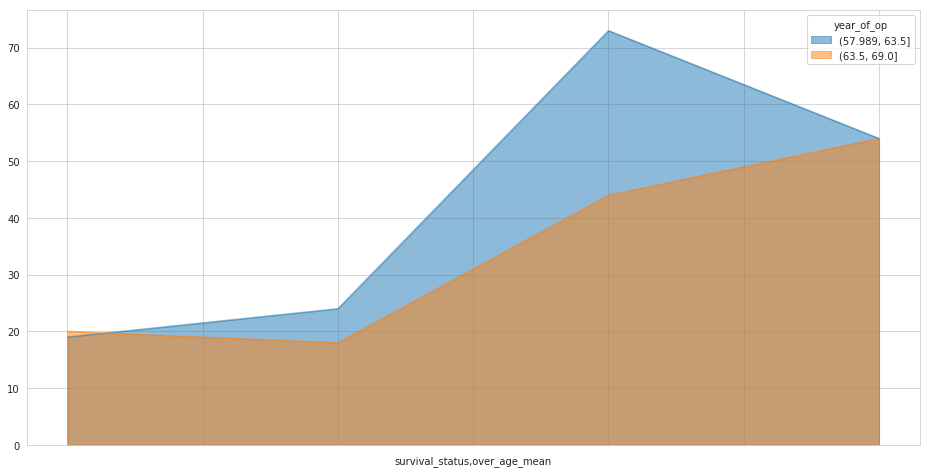

In [0]:
#2nd crosstab plots, 
ct2.plot.area(figsize(16,8), stacked=False);

In [0]:
# importing another visualization library
import seaborn as sns

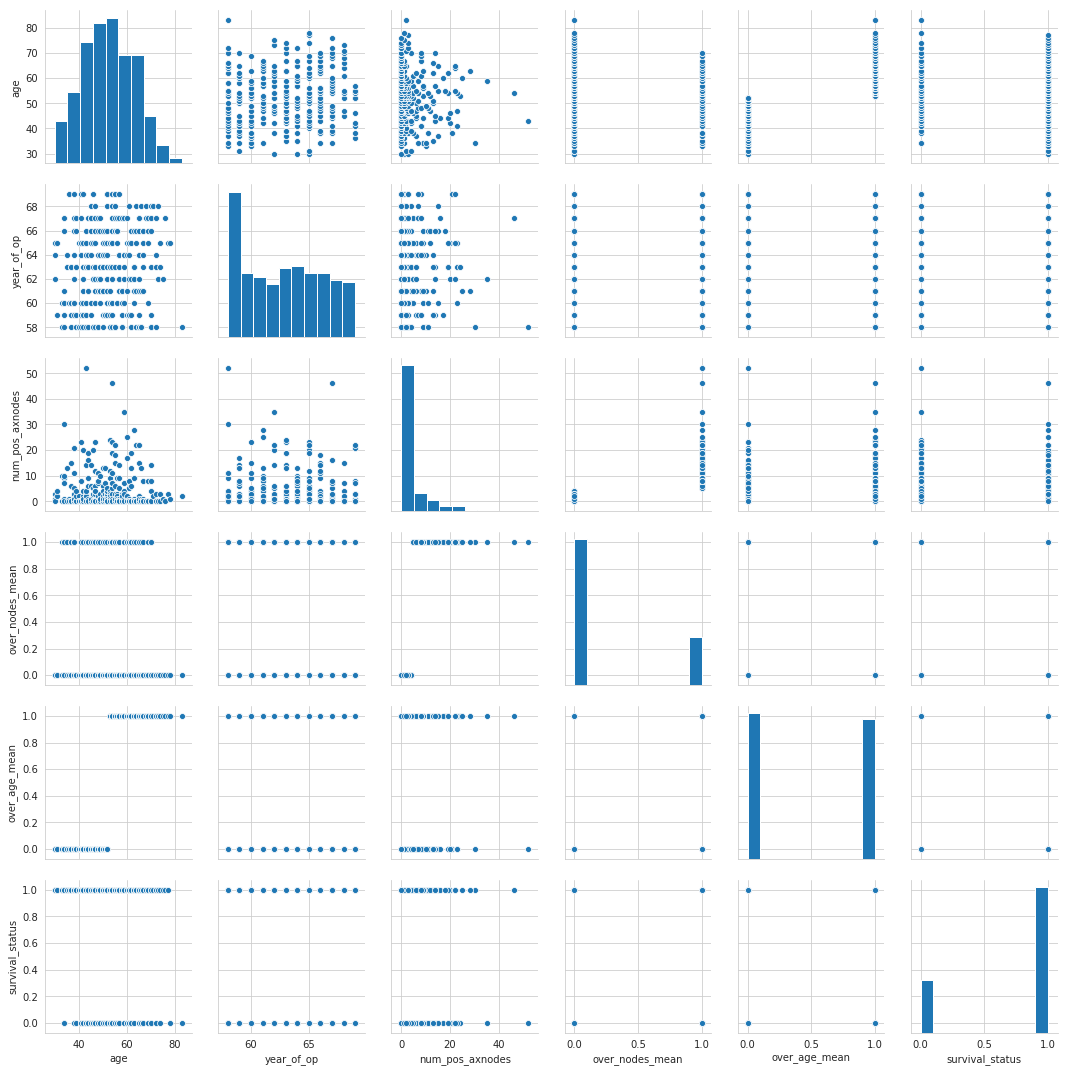

In [0]:
# a plot that gives a broad look of all relationship 
sns.set_style('whitegrid')
sns.pairplot(bc)

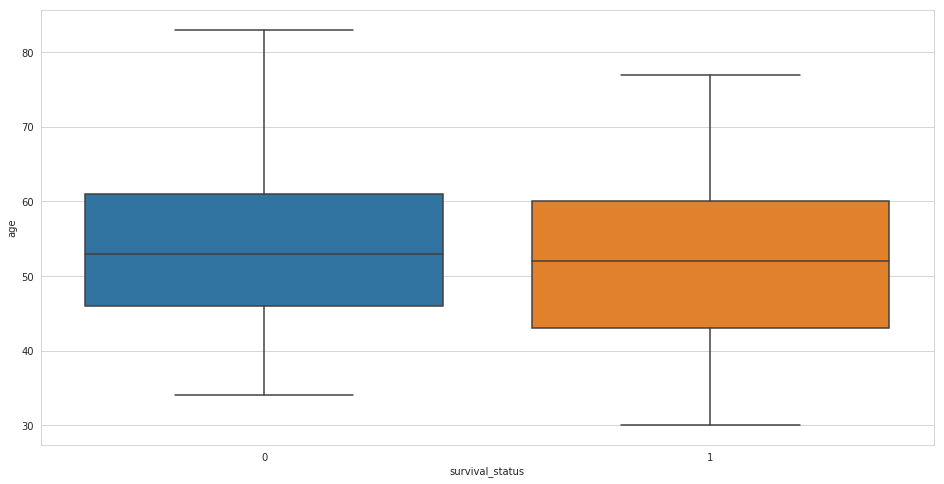

In [0]:
# boxplot displaying survival in relationship with age
sns.boxplot(x=bc['survival_status'], y=bc['age']);

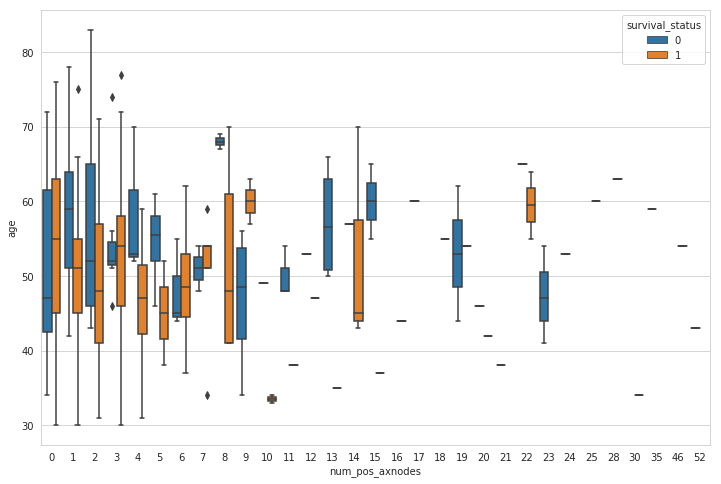

In [0]:
# boxplot displaying survival relationship with num_pos_axnodes
sns.boxplot(y=bc['age'], x=bc['num_pos_axnodes'], hue=bc['survival_status']);

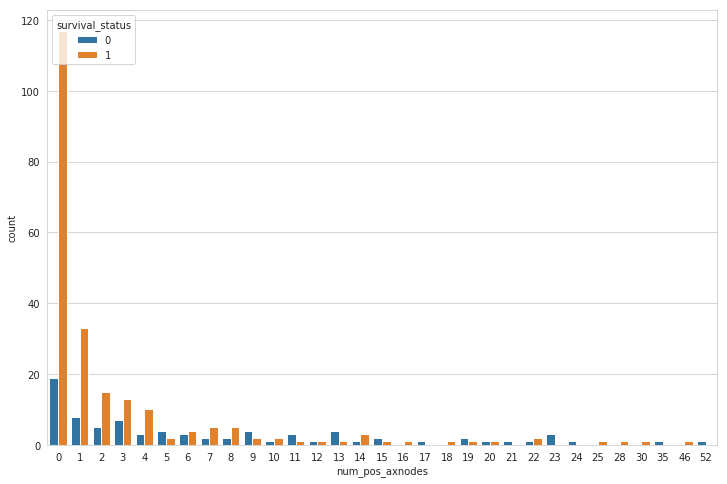

In [0]:
sns.countplot(x=bc['num_pos_axnodes'], hue=bc['survival_status']);

## Part 3 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

- What is at least one feature that looks to have a positive relationship with survival?
- What is at least one feature that looks to have a negative relationship with survival?
- How are those two features related with each other, and what might that mean?

Answer with text, but feel free to intersperse example code/results or refer to it from earlier.

# Data Anaylsis 

It's hard to find strong relationship in this small dataset of 306 entries. The one feature that looks to have a positive relationship with survival is age according to the boxplot above. However on the crosstab I notice if you got an operation 1963 patients were most likely to survive.  
One feature that had a negative relationship is the number of positive axillary nodes detected after 4 nodes found. It had a mean of 4 and max of 52 nodes. 
I can't find a strong relationship between those two features other then the amount of nodes get higher at the mean of age. According to the pariplot above.

